# **MOVIE RATING PREDICTION WITH PYTHON**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## LOAD DATASETS

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding = 'ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()    #display first 5rows
# df.tail()    #display last 5 rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()  #provide the summery of the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()  #provide the summery of the numerical columns

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:

# check missing value or NULL values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.shape #display ( no. of rows, no.of columns)


(15509, 10)

In [ ]:
df.isnull().sum()  #check null or  missing values

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)


In [ ]:

df.dropna(subset=["Rating"], inplace = True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df['Duration'] = df['Duration'].str.strip('min').str.strip()  # Remove 'min' and any extra spaces
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Fill missing values with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


In [ ]:

df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


# **EDA**

In [ ]:
sorted_df = df.sort_values(by='Rating', ascending=False)
print(sorted_df.head())

                      Name    Year  Duration             Genre  Rating Votes  \
8339       Love Qubool Hai  (2020)      94.0    Drama, Romance    10.0     5   
5410            Half Songs  (2021)      79.0    Music, Romance     9.7     7   
2563                 Breed  (2020)     135.0             Drama     9.6    48   
5077          Gho Gho Rani  (2019)     105.0  History, Romance     9.4    47   
14222  The Reluctant Crime  (2020)     113.0             Drama     9.4    16   

              Director            Actor 1          Actor 2  \
8339   Saif Ali Sayeed          Ahaan Jha   Mahesh Narayan   
5410       Sriram Raja       Raj Banerjee  Emon Chatterjee   
2563       Bobby Kumar        Bobby Kumar           Ashfaq   
5077      Munni Pankaj  Nishi Neha Mishra     Pankaj Kamal   
14222    Arvind Pratap    Dharmendra Ahir   Awanish Kotnal   

                   Actor 3  
8339   Rajasree Rajakumari  
5410     Purshottam Mulani  
2563        Fasih Choudhry  
5077           Akash Kumar  
1

In [ ]:
# Average rating by Genre and Year
genre_year_avg = df.groupby(['Genre', 'Year'])['Rating'].mean().sort_values(ascending=False)
print(genre_year_avg)

Genre                      Year  
Music, Romance             (2021)    9.7
History, Romance           (2019)    9.4
Sci-Fi                     (2021)    9.3
Documentary                (2019)    9.3
Family                     (2021)    9.3
                                    ... 
Drama, Mystery, Romance    (2013)    1.9
Action, Crime, Thriller    (2018)    1.9
Musical, Romance           (2021)    1.8
Romance, Thriller          (2017)    1.8
Action, Adventure, Comedy  (2011)    1.7
Name: Rating, Length: 3116, dtype: float64


In [ ]:
top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(5)
print(top_genres)


Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Music              8.9
Documentary, Thriller           8.7
Documentary, Sport              8.6
Name: Rating, dtype: float64


### Bar Chart

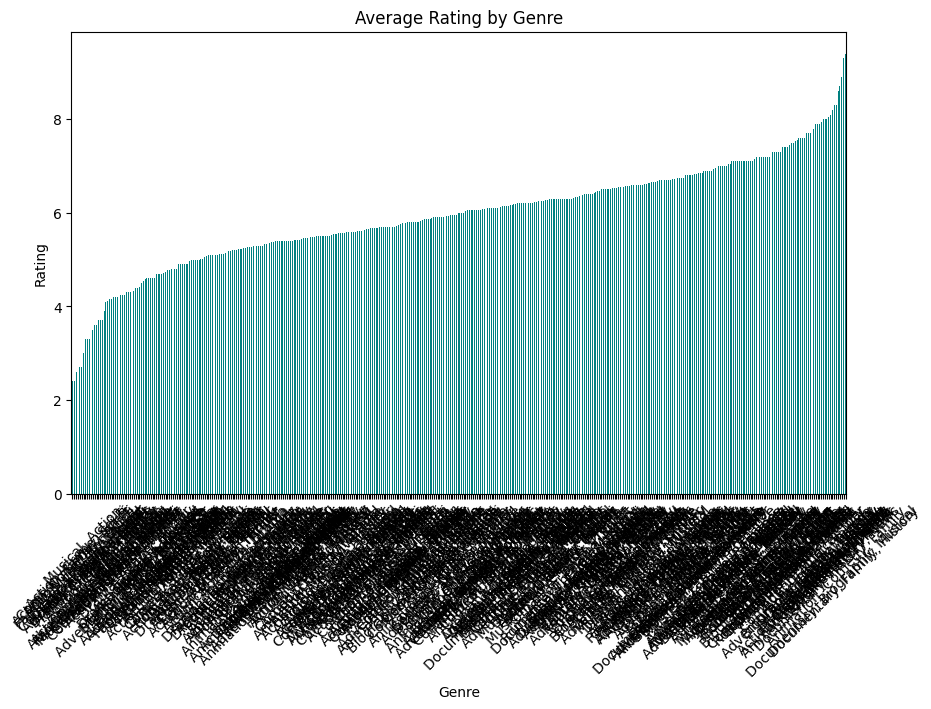

In [ ]:
genre_avg = df.groupby('Genre')['Rating'].mean().sort_values()
genre_avg.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Average Rating by Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


# Line chart

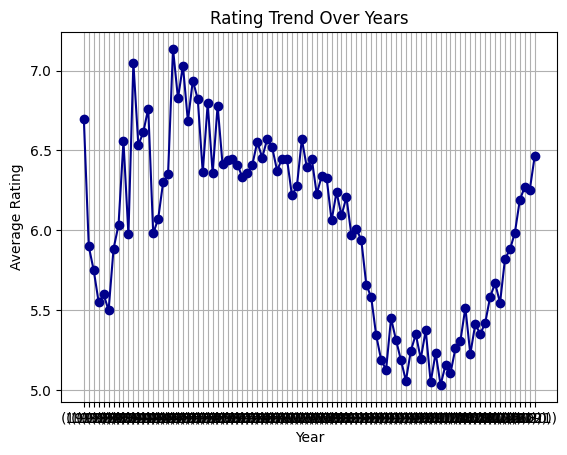

In [ ]:
#Rating treand over years
yearly_avg = df.groupby('Year')['Rating'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='darkblue')
plt.title('Rating Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# Pie Chart



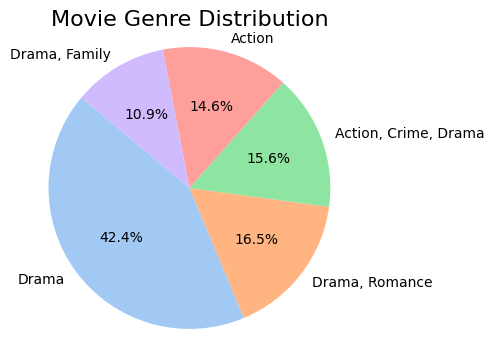

In [ ]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)
top_n_genres
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

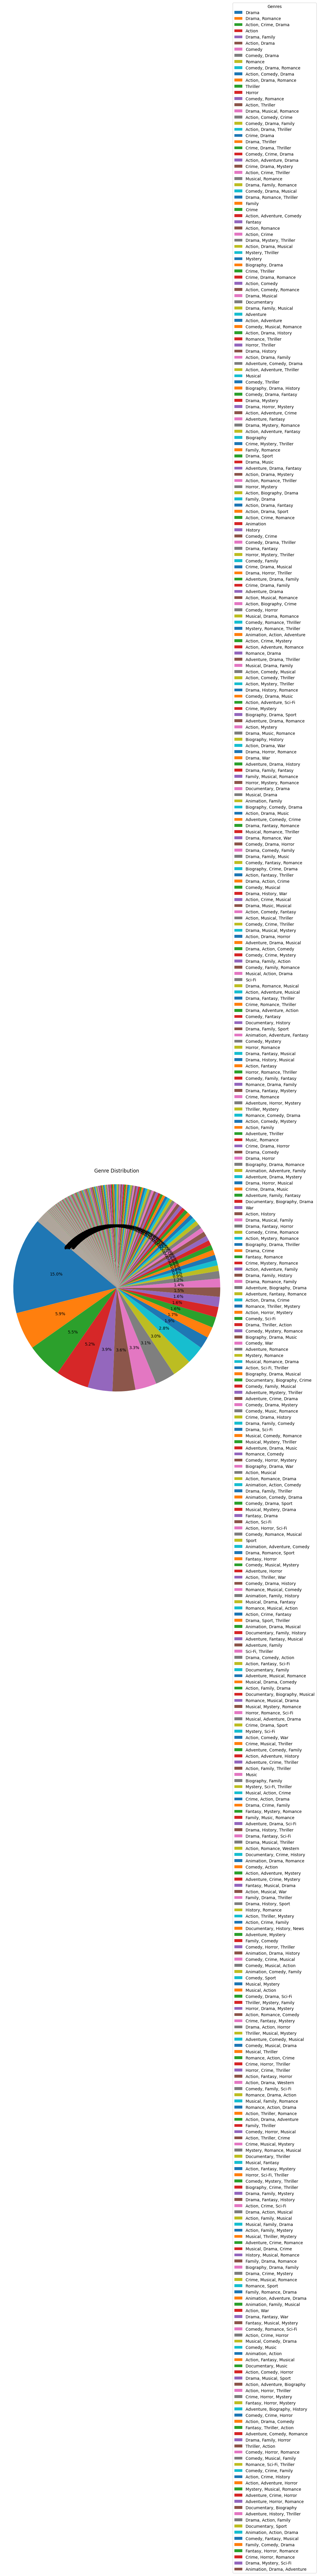

In [ ]:
#genre distribution
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(genre_counts, labels=None, autopct='%1.1f%%', startangle=140)

# for clarity
plt.legend(genre_counts.index, title='Genres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Genre Distribution')
plt.axis('equal')
plt.show()


### Histogram

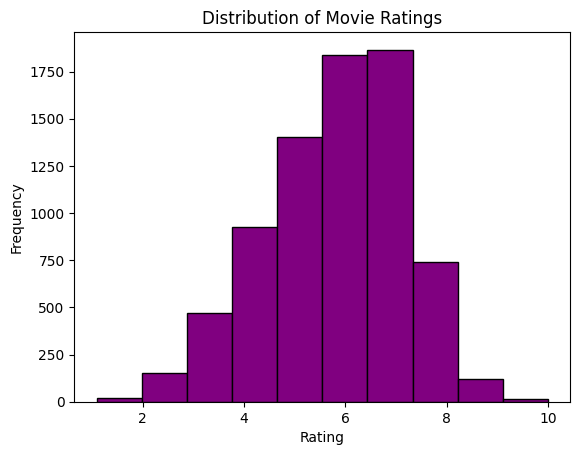

In [ ]:
plt.hist(df['Rating'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


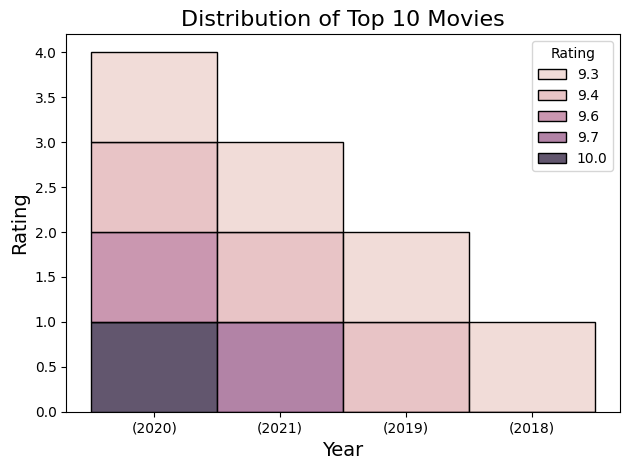

In [ ]:
#Distribution of Top 10 movies wrt Year
top_movie = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]

sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

### Scatter plot

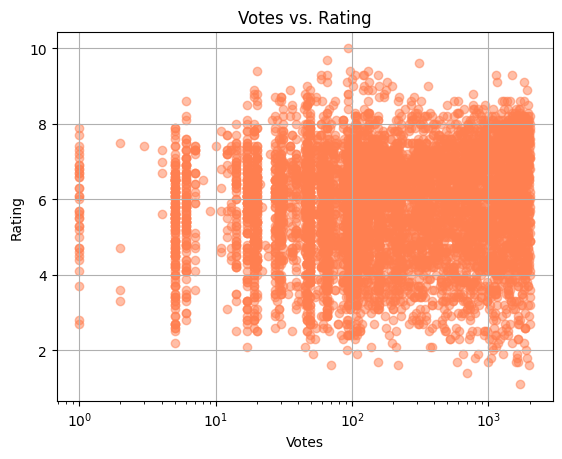

In [ ]:
plt.scatter(df['Votes'], df['Rating'], alpha=0.5, color='coral')
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')
plt.grid(True)
plt.show()


### Box plot

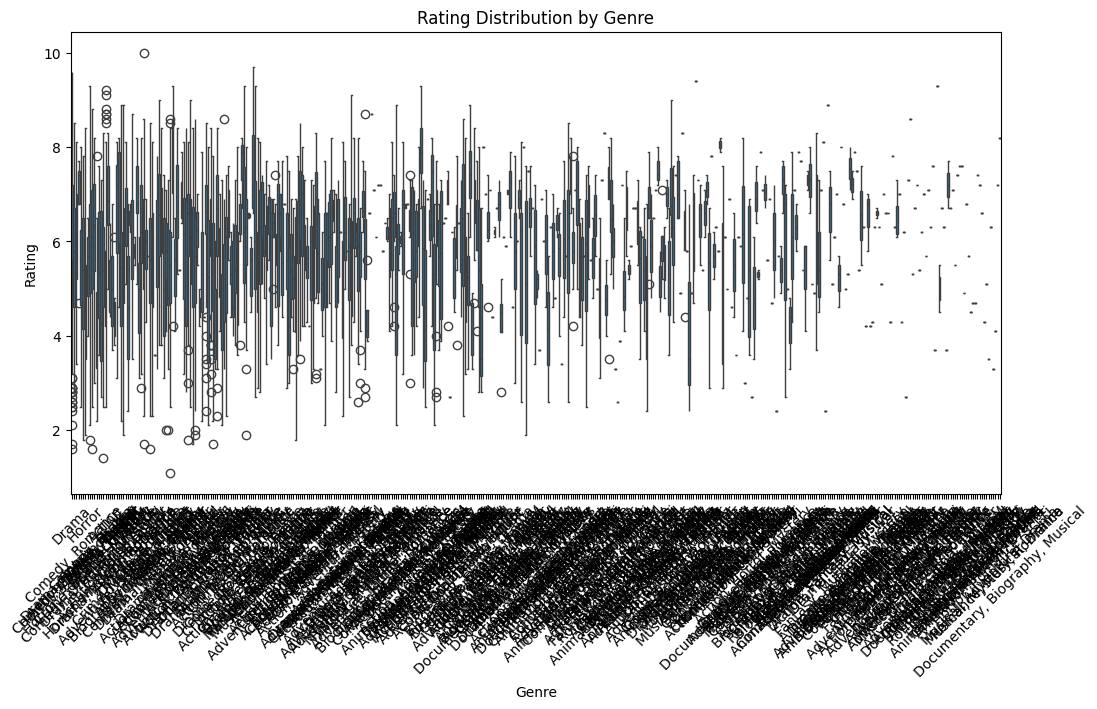

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


### Countplot

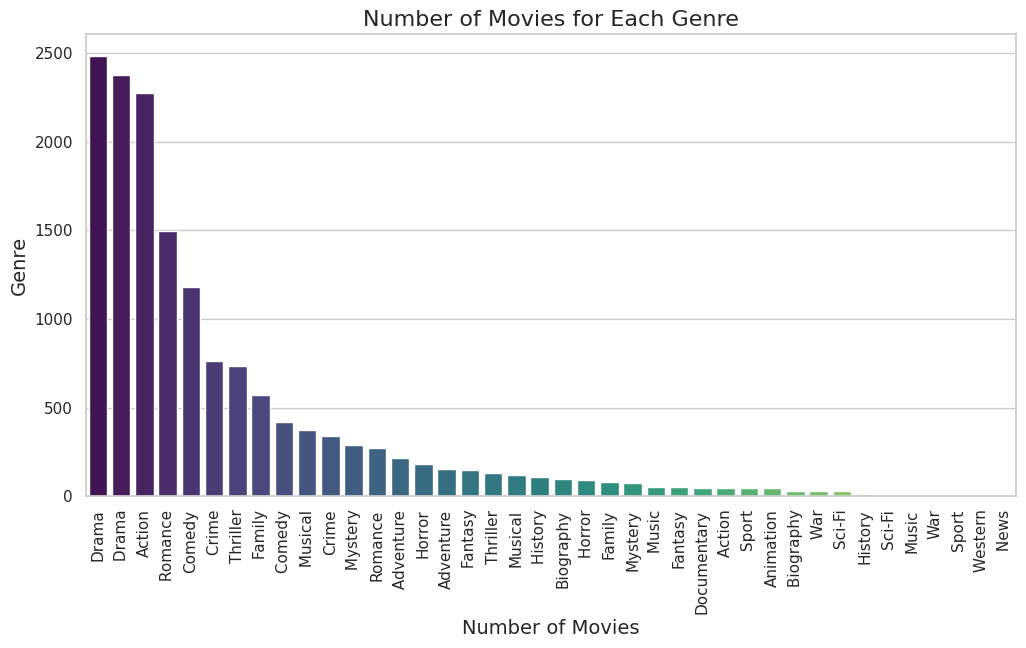

In [ ]:
df['Genre'] = df['Genre'].str.split(',')

genre_df = df.explode('Genre')
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109.0,252,7.0,8,755,1686,2725,373
3,(2019),110.0,205,4.4,35,1637,1500,865,2543
5,(1997),147.0,175,4.7,827,1881,481,84,2422
6,(2005),142.0,315,7.4,"1,086",2486,878,1346,2996
8,(2012),82.0,351,5.6,326,161,2385,1416,1189


In [ ]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)


,Rating
Rating,1.000000
Genre,0.122565
Actor 2,0.038852
Actor 3,0.031550
Actor 1,0.025089
Duration,-0.001801
Director,-0.003678


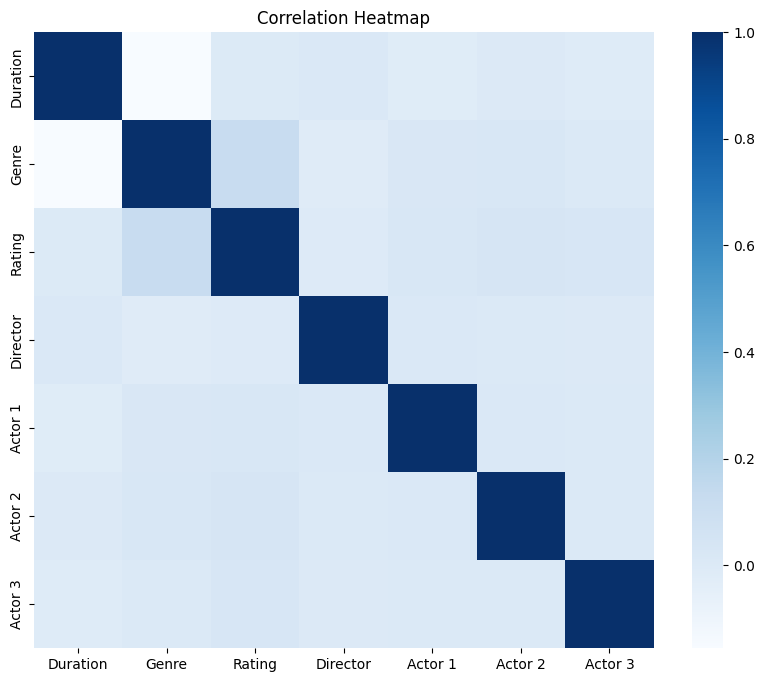

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,annot=False,cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

### model training

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)


In [ ]:
print(df['Year'].unique())
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace('[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')



['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(1946)' '(2008)' '(1994)' '(2007)' '(2013)' '(2003)' '(1998)' '(1979)'
 '(1974)' '(2015)' '(2006)' '(1981)' '(2020)' '(1985)' '(2011)' '(1988)'
 '(1995)' '(1987)' '(1999)' '(1973)' '(1968)' '(1953)' '(1986)' '(1982)'
 '(1977)' '(1950)' '(1969)' '(1948)' '(1967)' '(1970)' '(1990)' '(1989)'
 '(1947)' '(2001)' '(2000)' '(1971)' '(1978)' '(1944)' '(1963)' '(1992)'
 '(1976)' '(1984)' '(1975)' '(1980)' '(1966)' '(1972)' '(1956)' '(1960)'
 '(1964)' '(1952)' '(1959)' '(1951)' '(1954)' '(1962)' '(1961)' '(1957)'
 '(1965)' '(1996)' '(1933)' '(1955)' '(1983)' '(1936)' '(1949)' '(1940)'
 '(1945)' '(1938)' '(1941)' '(1942)' '(1932)' '(1935)' '(1937)' '(1931)'
 '(1943)' '(1917)' '(1939)' '(1934)']


In [ ]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace('[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])  # or fillna, if preferred


In [ ]:
print(X_train.dtypes)
print(X_train.head())

Year         object
Duration    float64
Genre         int64
Votes        object
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object
         Year  Duration  Genre Votes  Director  Actor 1  Actor 2  Actor 3
1399   (1988)     149.0    252    16      1475     2001     2678     1942
10841  (2017)      96.0    169   189        64     1965      963     1719
11637  (1980)     169.0     19   475      2824      599      170     3024
7918   (2000)     134.0    177   887       586      725     2603     1572
4356   (1986)     139.0     38    18       471     1230      216     2017


In [ ]:
# Convert all columns in X_train to proper numeric format
for col in X_train.columns:
    X_train[col] = X_train[col].astype(str).str.extract(r'(\d+\.?\d*)')  # Extract numeric part
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')          # Convert to float, set invalids to NaN

# Fill any remaining NaN values (optional: you can use mean, median, or drop rows)
X_train.fillna(X_train.median(), inplace=True)


In [ ]:
# Train models
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Clean and convert string-like numeric values in X_test
for col in X_test.columns:
    X_test[col] = X_test[col].astype(str).str.extract(r'(\d+\.?\d*)')  # Extract numeric part
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')          # Convert to float, set invalids to NaN

# Fill any missing values
X_test.fillna(X_test.median(), inplace=True)


In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

### Model Evaluation

In [ ]:
# Compute metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Compute metrics for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)


In [ ]:
def print_metrics(name, y_true, y_pred):
    print(f"📍 {name}")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print()

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Decision Tree Regression", y_test, y_pred_dt)

📍 Linear Regression
MSE: 1.7829162149340985
MAE: 1.0512772307649212
R²: 0.03773735058952987

📍 Decision Tree Regression
MSE: 2.51765873015873
MAE: 1.208862433862434
R²: -0.3588125676917955



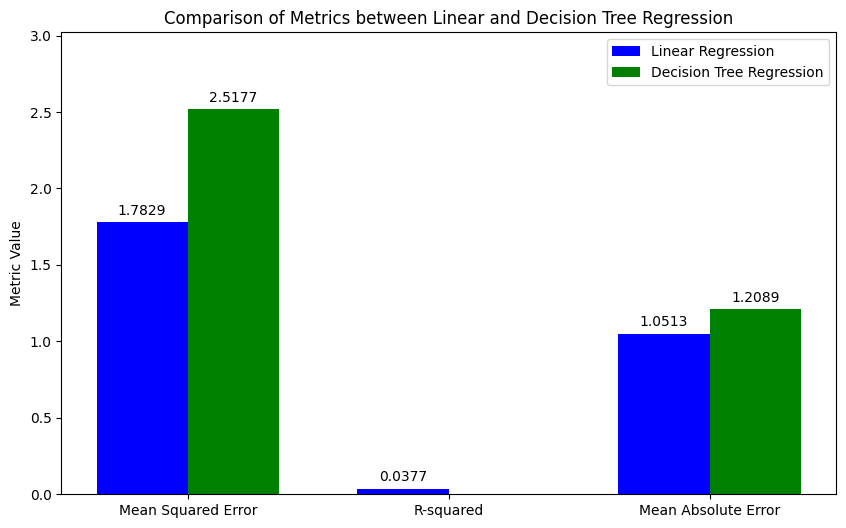

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming we have already computed lr_metrics and dt_metrics
metrics = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']
lr_metrics = [mse_lr, r2_lr, mae_lr]
dt_metrics = [mse_dt, r2_dt, mae_dt]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Linear Regression', color='blue')
rects2 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree Regression', color='green')

ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics between Linear and Decision Tree Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, max(max(lr_metrics), max(dt_metrics)) * 1.2)  # Setting ylim for better visualization
plt.show()